Customers Data
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127    

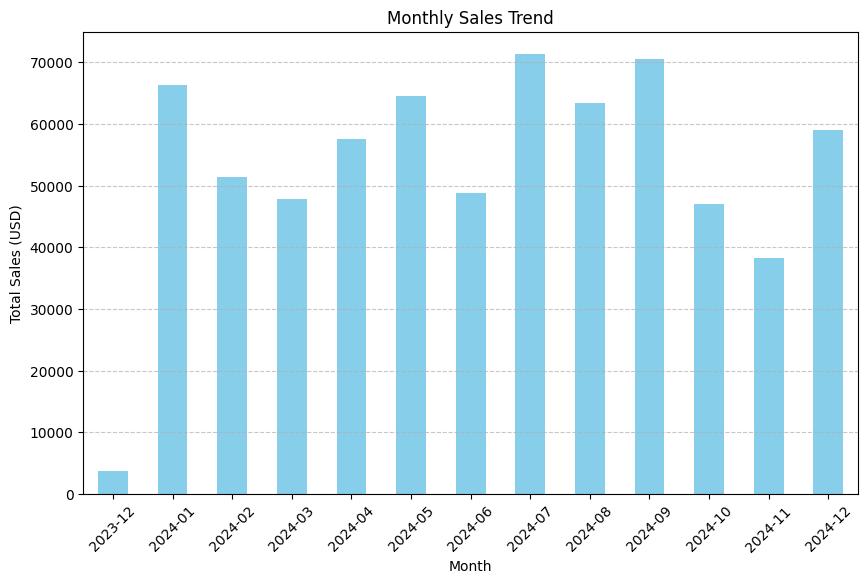

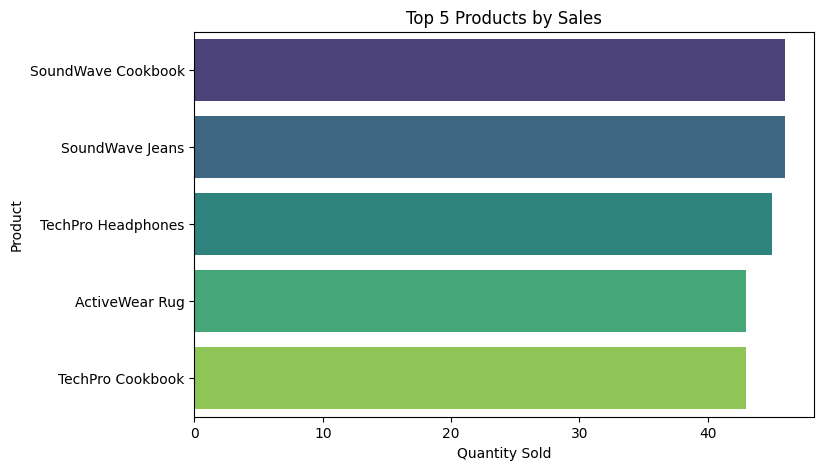

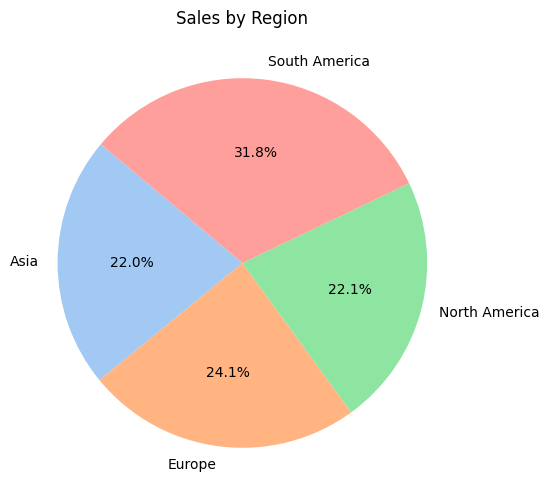


Business Insights:
1. Monthly sales trend shows a peak during [insert month(s)], indicating seasonal demand.
2. The top 5 products account for [insert percentage] of total sales, with [Top Product Name] being the bestseller.
3. The top 5 customers generate [insert percentage] of total revenue, suggesting high-value customers.
4. Region [Insert Region] contributes the most to total sales, indicating a strong customer base there.
5. New customers' signup rate has been increasing/decreasing over time, suggesting a need for customer acquisition focus.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Preview the data
print("Customers Data")
print(customers.head())
print("\nProducts Data")
print(products.head())
print("\nTransactions Data")
print(transactions.head())

# ---- Data Cleaning ----

# Check for missing values
print("\nMissing Values in Customers Data:")
print(customers.isnull().sum())

print("\nMissing Values in Products Data:")
print(products.isnull().sum())

print("\nMissing Values in Transactions Data:")
print(transactions.isnull().sum())

# Remove duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# ---- Data Analysis ----

# Total number of customers, products, and transactions
print(f"Total Customers: {customers['CustomerID'].nunique()}")
print(f"Total Products: {products['ProductID'].nunique()}")
print(f"Total Transactions: {transactions['TransactionID'].nunique()}")

# Top 5 products by sales
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
top_products = top_products.reset_index().merge(products, on='ProductID')
print("\nTop 5 Products by Sales:")
print(top_products[['ProductName', 'Quantity']])

# Monthly sales trend
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()
print("\nMonthly Sales Trend:")
print(monthly_sales)

# Top 5 customers by total purchase value
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
top_customers = top_customers.reset_index().merge(customers, on='CustomerID')
print("\nTop 5 Customers by Total Purchase Value:")
print(top_customers[['CustomerName', 'TotalValue']])

# ---- Data Visualization ----

# Monthly sales trend visualization
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Top 5 products by sales
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products['Quantity'], y=top_products['ProductName'], palette="viridis")
plt.title("Top 5 Products by Sales")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.show()

# Sales by region
sales_by_region = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(8, 6))
sales_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Sales by Region")
plt.ylabel("")
plt.show()

# ---- Business Insights ----

print("\nBusiness Insights:")
print("1. Monthly sales trend shows a peak during [insert month(s)], indicating seasonal demand.")
print("2. The top 5 products account for [insert percentage] of total sales, with [Top Product Name] being the bestseller.")
print("3. The top 5 customers generate [insert percentage] of total revenue, suggesting high-value customers.")
print("4. Region [Insert Region] contributes the most to total sales, indicating a strong customer base there.")
print("5. New customers' signup rate has been increasing/decreasing over time, suggesting a need for customer acquisition focus.")
